<a href="https://colab.research.google.com/github/KARENCMP82/Python/blob/main/6_KMEANS_RRB_MOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans #Importamos KMeans


In [157]:
#Conexion
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
RANDOM_STATE = 175
PATH_FOLDER = '/content/drive/MyDrive/Colab Notebooks/Ejercicios/'

In [159]:
print("Working with this sklearn version{}".format(sklearn.__version__))

Working with this sklearn version1.6.1


In [160]:
PATH_CUSTOMERS = os.path.join(PATH_FOLDER, 'kmeans_olist_customers_dataset.csv')

customer_df = pd.read_csv(PATH_CUSTOMERS)

In [161]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [162]:
PATH_ORDERS = os.path.join(PATH_FOLDER, 'kmeans_olist_orders_dataset.csv')

orders_df = pd.read_csv(PATH_ORDERS)

In [163]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [164]:
PATH_PAYMENTS = os.path.join(PATH_FOLDER, 'kmeans_olist_order_payments_dataset.csv')

payments_df = pd.read_csv(PATH_PAYMENTS)

In [165]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


# Exploratory Data Analysty

# EDA customers df

In [166]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print(df.info(verbose = verbose)) #comentario: Imprime información del DataFrame (tipos de datos, columnas, etc.)
    total_nulos = df.isnull().sum().sum() #comentario: Calcula el número total de valores nulos en el DataFrame.
    print() #comentario: Imprime una línea en blanco para mejorar la legibilidad.
    print(f"Tenemos un total de {total_nulos} nulos") #comentario: Imprime el número total de nulos encontrados.

In [167]:
report_df(customer_df)

customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Tenemos un total de 0 nulos


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [168]:
customer_id = customer_df["customer_id"].nunique()
customer_unique_id = customer_df["customer_unique_id"].nunique()

print(f'''Tenemos un total de {customer_unique_id} clientes únicos,\n
para un total de {customer_id} pedidos (en el esquema de Olist, especifican que el id único es customer_unique_id\n
y que customer_id es un id que se genera en cada compra y por tanto a la práctica viene a ser lo mismo que un pedido).\n
Esto implica un ratio de {round(customer_id/customer_unique_id, 2)} pedidos por cliente.
''')

Tenemos un total de 96096 clientes únicos,

para un total de 99441 pedidos (en el esquema de Olist, especifican que el id único es customer_unique_id

y que customer_id es un id que se genera en cada compra y por tanto a la práctica viene a ser lo mismo que un pedido).

Esto implica un ratio de 1.03 pedidos por cliente.



# EDA orders df

In [169]:
report_df(orders_df)

orders_df.head(3).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Tenemos un total de 4908 nulos


,0,1,2
order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d
customer_id,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089
order_status,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2018-07-24 20:41:37,2018-08-08 08:38:49
order_approved_at,2017-10-02 11:07:15,2018-07-26 03:24:27,2018-08-08 08:55:23
order_delivered_carrier_date,2017-10-04 19:55:00,2018-07-26 14:31:00,2018-08-08 13:50:00
order_delivered_customer_date,2017-10-10 21:25:13,2018-08-07 15:27:45,2018-08-17 18:06:29
order_estimated_delivery_date,2017-10-18 00:00:00,2018-08-13 00:00:00,2018-09-04 00:00:00


In [170]:
orders_df["order_status"].value_counts()

,count
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [171]:
# tenemos nulls en las fechas, habrá o bien eliminar estos nulos o imputarles una fecha
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [172]:
order_id = orders_df["order_id"].nunique()
customer_id_orders = orders_df["customer_id"].nunique()

print(f"Tenemos un total de {order_id} pedidos")
print(f"Tenemos un total de {customer_unique_id} customer únicos (de la tabla de customers)")
print(f"La relación de pedidos por clientes es de {round(order_id/customer_unique_id, 2)}")

Tenemos un total de 99441 pedidos
Tenemos un total de 96096 customer únicos (de la tabla de customers)
La relación de pedidos por clientes es de 1.03


# EDA payments df

In [173]:
report_df(payments_df)

payments_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Tenemos un total de 0 nulos


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [174]:
order_id_pay = payments_df["order_id"].nunique()
print(f"Tenemos un total de {order_id_pay} pedidos únicos en la tabla de payments")

Tenemos un total de 99440 pedidos únicos en la tabla de payments


In [175]:
payments_df["payment_type"].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


# Creación de variables

In [176]:
# hacemos un groupby por order y calculamos algunas métricas básicas como max, min, media y similares.
# Hemos visto que gran parte de los pagos son únicos, por tanto coincidirán en la mayoría, pero en los demás casos
# nos van a aportar información útil sobre el cliente.

aggregated_payments = payments_df.groupby('order_id').agg( #comentario: Agrupa el DataFrame 'payments_df' por la columna 'order_id' y aplica funciones de agregación.
    max_pay = ('payment_value', 'max'), #comentario: Calcula el valor máximo de 'payment_value' para cada grupo 'order_id' y lo nombra 'max_pay'.
    min_pay = ('payment_value', 'min'), #comentario: Calcula el valor mínimo de 'payment_value' para cada grupo 'order_id' y lo nombra 'min_pay'.
    mean_pay = ('payment_value', 'mean'), #comentario: Calcula el valor promedio de 'payment_value' para cada grupo 'order_id' y lo nombra 'mean_pay'.
    total_pay = ('payment_value', 'sum'), #comentario: Calcula la suma total de 'payment_value' para cada grupo 'order_id' y lo nombra 'total_pay'.
    max_seq = ('payment_sequential', 'max') #comentario: Calcula el valor máximo de 'payment_sequential' para cada grupo 'order_id' y lo nombra 'max_seq'.
)

In [177]:
aggregated_payments.head()

,max_pay,min_pay,mean_pay,total_pay,max_seq
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,72.19,72.19,72.19,72.19,1
00018f77f2f0320c557190d7a144bdd3,259.83,259.83,259.83,259.83,1
000229ec398224ef6ca0657da4fc703e,216.87,216.87,216.87,216.87,1
00024acbcdf0a6daa1e931b038114c75,25.78,25.78,25.78,25.78,1
00042b26cf59d7ce69dfabb4e55b4fd9,218.04,218.04,218.04,218.04,1


In [178]:
aggregated_payments[aggregated_payments["max_seq"] == 3]

,max_pay,min_pay,mean_pay,total_pay,max_seq
order_id,,,,,
00bd50cdd31bd22e9081e6e2d5b3577b,40.46,4.88,28.600000,85.80,3
039f61edec89c6f0edf8dd1a0bdea1fe,166.22,50.00,105.406667,316.22,3
03e5d6a8dd520898f86f8429ccd07c21,46.80,42.24,45.280000,135.84,3
06875ab72c5b9bb2eb303a70031bfeb0,22.68,2.32,15.893333,47.68,3
070d6fe21e7d454b11f1cb27ca2c15c0,89.46,4.78,39.410000,118.23,3
...,...,...,...,...,...
fb260abf14e47c95a0b19acb1ab3ed43,20.00,0.94,11.666667,35.00,3
fd2b75f431649ee3de573b444d320f48,49.02,25.00,33.006667,99.02,3
fd513fb508fefbe0ce7bfb8fd1bee4fc,66.49,3.54,24.690000,74.07,3


In [179]:
orders_with_payments = pd.merge(orders_df, aggregated_payments, on = 'order_id')

In [180]:
report_df(orders_with_payments)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99440 non-null  object 
 1   customer_id                    99440 non-null  object 
 2   order_status                   99440 non-null  object 
 3   order_purchase_timestamp       99440 non-null  object 
 4   order_approved_at              99280 non-null  object 
 5   order_delivered_carrier_date   97657 non-null  object 
 6   order_delivered_customer_date  96475 non-null  object 
 7   order_estimated_delivery_date  99440 non-null  object 
 8   max_pay                        99440 non-null  float64
 9   min_pay                        99440 non-null  float64
 10  mean_pay                       99440 non-null  float64
 11  total_pay                      99440 non-null  float64
 12  max_seq                        99440 non-null 

In [181]:
orders_with_payments.set_index('order_id', inplace = True)

In [182]:
orders_with_payments.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,max_pay,min_pay,mean_pay,total_pay,max_seq
order_id,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,18.59,2.00,12.903333,38.71,3
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,141.46,141.46,141.460000,141.46,1
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,179.12,179.12,179.120000,179.12,1
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,72.20,72.20,72.200000,72.20,1
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,28.62,28.62,28.620000,28.62,1


In [183]:
# convertimos las fechas al formato fechas dado que hasta ahora eran object y no nos permitían hacer
# casi ninguna transformación

orders_with_payments['order_purchase_timestamp'] =\
pd.to_datetime(orders_with_payments['order_purchase_timestamp'], format = '%Y-%m-%d %H:%M:%S')
#comentario: Convierte la columna 'order_purchase_timestamp' al tipo datetime, especificando el formato de fecha.

orders_with_payments['order_delivered_customer_date'] =\
pd.to_datetime(orders_with_payments['order_delivered_customer_date'], format = '%Y-%m-%d %H:%M:%S')
#comentario: Convierte la columna 'order_delivered_customer_date' al tipo datetime, especificando el formato de fecha.

orders_with_payments['order_estimated_delivery_date'] =\
pd.to_datetime(orders_with_payments['order_estimated_delivery_date'], format = '%Y-%m-%d %H:%M:%S')
#comentario: Convierte la columna 'order_estimated_delivery_date' al tipo datetime, especificando el formato de fecha.

In [184]:
orders_with_payments.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,max_pay,min_pay,mean_pay,total_pay,max_seq
order_id,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,18.59,2.00,12.903333,38.71,3
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46,141.46,141.460000,141.46,1
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12,179.12,179.120000,179.12,1
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,72.20,72.20,72.200000,72.20,1
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,28.62,28.62,28.620000,28.62,1


In [185]:
orders_with_payments.head()

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,max_pay,min_pay,mean_pay,total_pay,max_seq
order_id,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,18.59,2.00,12.903333,38.71,3
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46,141.46,141.460000,141.46,1
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12,179.12,179.120000,179.12,1
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,72.20,72.20,72.200000,72.20,1
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,28.62,28.62,28.620000,28.62,1


In [186]:
# creamos variables útiles extrayendo la información de los pedidos.
# Por ejemplo: tiempo desde la última compra puede ser muy útil para que nuestro modelo detecte clientes
# recientes y combinando con la variable de pedidos totales podrá ser muy valiosas para segmentar a los clientes
# muy fidelizados.

orders_with_payments['last_purchase'] = orders_with_payments['order_purchase_timestamp'].max()

orders_with_payments['time_since_last_purchase'] =\
orders_with_payments['last_purchase'] - orders_with_payments['order_purchase_timestamp']

orders_with_payments['delivery_time'] =\
orders_with_payments['order_delivered_customer_date'] - orders_with_payments['order_purchase_timestamp']

orders_with_payments['delay'] =\
orders_with_payments['order_delivered_customer_date'] - orders_with_payments['order_estimated_delivery_date']

In [187]:
orders_with_payments.head(3).T

order_id,e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d
customer_id,9ef432eb6251297304e76186b10a928d,b0830fb4747a6c6d20dea0b8c802d7ef,41ce2a54c0b03bf3443c3d931a367089
order_status,delivered,delivered,delivered
order_purchase_timestamp,2017-10-02 10:56:33,2018-07-24 20:41:37,2018-08-08 08:38:49
order_approved_at,2017-10-02 11:07:15,2018-07-26 03:24:27,2018-08-08 08:55:23
order_delivered_carrier_date,2017-10-04 19:55:00,2018-07-26 14:31:00,2018-08-08 13:50:00
order_delivered_customer_date,2017-10-10 21:25:13,2018-08-07 15:27:45,2018-08-17 18:06:29
order_estimated_delivery_date,2017-10-18 00:00:00,2018-08-13 00:00:00,2018-09-04 00:00:00
max_pay,18.59,141.46,179.12
min_pay,2.0,141.46,179.12
mean_pay,12.903333,141.46,179.12


# Join final con clientes y variables finales

In [188]:
df_final = pd.merge(customer_df, orders_with_payments, on = "customer_id")

In [189]:
df_final.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,max_pay,min_pay,mean_pay,total_pay,max_seq,last_purchase,time_since_last_purchase,delivery_time,delay
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,146.87,146.87,146.87,146.87,1,2018-10-17 17:30:18,519 days 02:24:43,8 days 19:30:00,-11 days +10:35:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,335.48,335.48,335.48,335.48,1,2018-10-17 17:30:18,277 days 20:41:54,16 days 15:52:55,-8 days +12:41:19
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,157.73,157.73,157.73,157.73,1,2018-10-17 17:30:18,151 days 01:22:33,26 days 01:51:06,1 days 17:58:51
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,173.30,173.30,173.30,173.30,1,2018-10-17 17:30:18,218 days 01:23:40,14 days 23:57:47,-13 days +16:04:25
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,252.25,252.25,252.25,252.25,1,2018-10-17 17:30:18,80 days 07:38:48,11 days 11:04:18,-6 days +20:55:48


In [190]:
df_final.set_index("customer_unique_id", inplace = True)

lc = [
    'max_pay',
    'min_pay',
    'mean_pay',
    'total_pay',
    'max_seq',
    'time_since_last_purchase',
    'delivery_time',
    'delay'
    # 'compra_weekend',
    # 'compra_horariolab'
]

df_final = df_final[lc]

In [191]:
df_final.head()

,max_pay,min_pay,mean_pay,total_pay,max_seq,time_since_last_purchase,delivery_time,delay
customer_unique_id,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,146.87,146.87,146.87,146.87,1,519 days 02:24:43,8 days 19:30:00,-11 days +10:35:35
290c77bc529b7ac935b93aa66c333dc3,335.48,335.48,335.48,335.48,1,277 days 20:41:54,16 days 15:52:55,-8 days +12:41:19
060e732b5b29e8181a18229c7b0b2b5e,157.73,157.73,157.73,157.73,1,151 days 01:22:33,26 days 01:51:06,1 days 17:58:51
259dac757896d24d7702b9acbbff3f3c,173.30,173.30,173.30,173.30,1,218 days 01:23:40,14 days 23:57:47,-13 days +16:04:25
345ecd01c38d18a9036ed96c73b8d066,252.25,252.25,252.25,252.25,1,80 days 07:38:48,11 days 11:04:18,-6 days +20:55:48


In [192]:
# CREACIÓN DE VARIABLES
# extraemos los días de la variable timedelta que teníamos calculada previamente.
df_final["time_since_last_purchase"] = df_final["time_since_last_purchase"].dt.days
df_final["delivery_time"] = df_final["delivery_time"].dt.days
df_final["delay"] = df_final["delay"].dt.days

In [193]:
df_final.head(3).T

customer_unique_id,861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e
max_pay,146.87,335.48,157.73
min_pay,146.87,335.48,157.73
mean_pay,146.87,335.48,157.73
total_pay,146.87,335.48,157.73
max_seq,1.00,1.00,1.00
time_since_last_purchase,519.00,277.00,151.00
delivery_time,8.00,16.00,26.00
delay,-11.00,-8.00,1.00


In [194]:
report_df(df_final)

df_final.sample(3).T

<class 'pandas.core.frame.DataFrame'>
Index: 99440 entries, 861eff4711a542e4b93843c6dd7febb0 to 84732c5050c01db9b23e19ba39899398
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   max_pay                   99440 non-null  float64
 1   min_pay                   99440 non-null  float64
 2   mean_pay                  99440 non-null  float64
 3   total_pay                 99440 non-null  float64
 4   max_seq                   99440 non-null  int64  
 5   time_since_last_purchase  99440 non-null  int64  
 6   delivery_time             96475 non-null  float64
 7   delay                     96475 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 6.8+ MB
None

Tenemos un total de 5930 nulos


customer_unique_id,3e69c94333cf73d1e18fe0eefc9f60a4,54038fdafde7c49533a306f961281d9c,e6b2f88aff1cd27ac49cc0b10b60d782
max_pay,289.26,246.44,113.22
min_pay,289.26,246.44,113.22
mean_pay,289.26,246.44,113.22
total_pay,289.26,246.44,113.22
max_seq,1.00,1.00,1.00
time_since_last_purchase,220.00,76.00,284.00
delivery_time,16.00,14.00,12.00
delay,-2.00,1.00,-19.00


In [195]:
# tenemos valores nulos y habrá que imputarlas de forma correcta en nuestro pipeline.
df_final.isnull().sum()

,0
max_pay,0
min_pay,0
mean_pay,0
total_pay,0
max_seq,0
time_since_last_purchase,0
delivery_time,2965
delay,2965


# Creación de nuestros propios Transformers (CORE IDEA)

In [196]:
def build_unique_id_features(X):

    aggregated_df = X.groupby(X.index).agg(  # Agrupa por índice y aplica agregaciones
        n_orders = ('total_pay', 'count'),    # Cuenta el número de pedidos
        amount = ('total_pay', 'sum'),       # Suma el valor total de los pagos
        avg_ticket = ('total_pay', 'mean'),   # Calcula el valor promedio de los pagos

        last_purchase = ('time_since_last_purchase', 'min'),  # Tiempo mínimo desde la última compra
        first_purchase = ('time_since_last_purchase', 'max'), # Tiempo máximo desde la última compra

        mean_delivery_time = ('delivery_time', 'mean'),    # Tiempo promedio de entrega
        max_delivery_time = ('delivery_time', 'max'),    # Tiempo máximo de entrega

        mean_delay = ('delay', 'mean'),   # Retraso promedio en la entrega
        max_delay = ('delay', 'max')    # Retraso máximo en la entrega

        # mean_compra_weekend = ('compra_weekend', 'mean'),
        # mean_compra_horariolab = ('compra_horariolab', 'mean')
    )

    return aggregated_df  # Devuelve el DataFrame agregado

In [197]:
ClientIdFeatureGenerator = FunctionTransformer(func = build_unique_id_features)

In [198]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()), #comentario: Imputa valores faltantes usando el algoritmo KNNImputer (vecinos más cercanos).
    ("CustomTransformer", ClientIdFeatureGenerator), #comentario: Aplica una transformación personalizada definida por la clase ClientIdFeatureGenerator.
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #comentario: Escala los datos utilizando RobustScaler, que es robusto a los valores atípicos,
    #utilizando el rango intercuartílico del 0% al 99%.
])

In [199]:
df_scaled_transformed = pipe.fit_transform(df_final)

In [200]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_scaled_transformed)

    sse[k] = clustering_model.inertia_

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


In [201]:
sse

{2: 28873.858433823792,
 3: 21005.498976319777,
 4: 16714.89057681262,
 5: 13372.923165229884,
 6: 11687.021142889005,
 7: 10534.27292881019,
 8: 9854.35922348467,
 9: 9393.54471522925,
 10: 8298.466235778198,
 11: 7988.187196128534,
 12: 7537.846152672729,
 13: 7290.152478300266,
 14: 6861.010907329964}

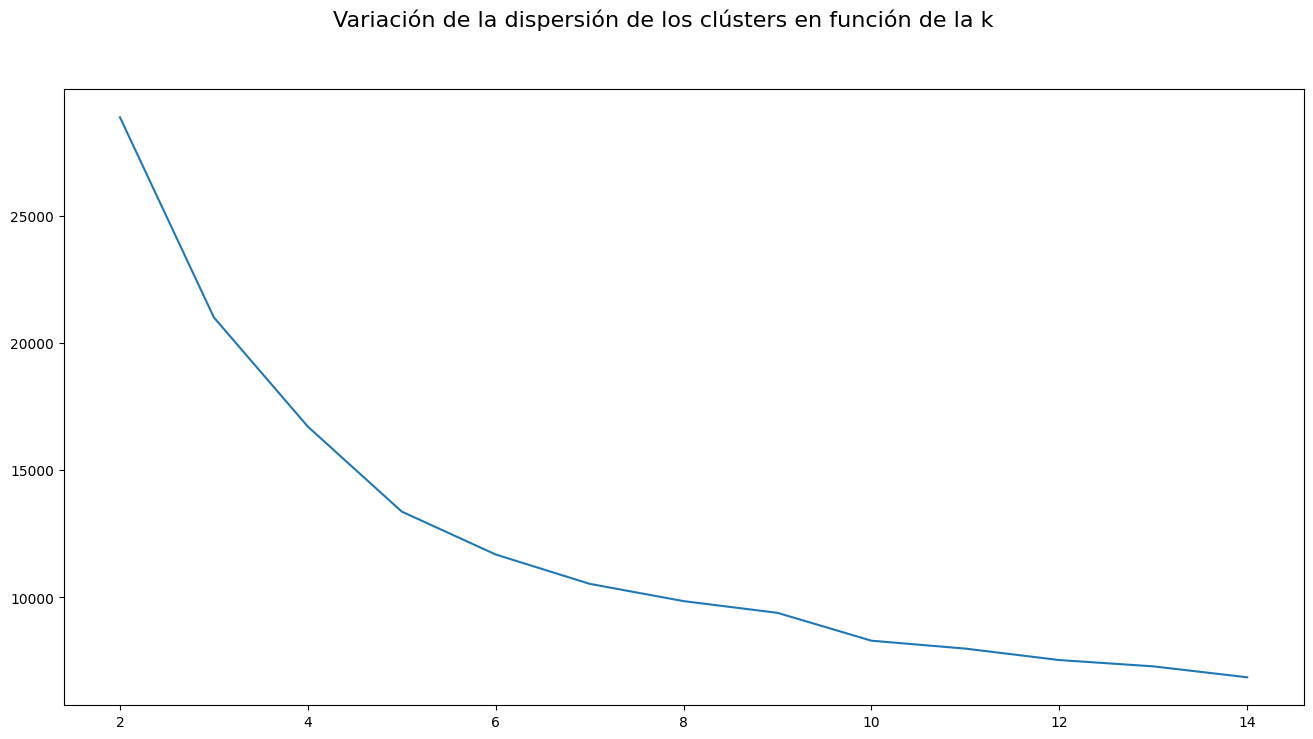

In [202]:
fig = plt.figure(figsize = (16, 8)) #comentario: Crea una nueva figura con un tamaño de 16x8 pulgadas.
ax = fig.add_subplot() #comentario: Agrega un subplot (un gráfico) a la figura.

x_values = list(sse.keys()) #comentario: Obtiene las claves del diccionario 'sse' (que representan el número de clústers 'k') y las convierte en una lista para el eje x
y_values = list(sse.values()) #comentario: Obtiene los valores del diccionario 'sse' (que representan la inercia/dispersión de los clústers) y las convierte en una
#lista

# para el eje y.

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers") #comentario: Traza un gráfico de líneas con los valores de 'k' en el eje x y la inercia en
# el eje y, y añade una etiqueta para la leyenda.
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16); #comentario: Añade un título a la figura con un tamaño de fuente de 16.


# Segmentación de los clientes con la "k adecuada" (CORE IDEA)

In [203]:
pipe = Pipeline(steps = [
    ("Imputer", KNNImputer()), #comentario: Imputa valores faltantes usando el algoritmo KNNImputer (vecinos más cercanos).
    ("CustomTransformer", ClientIdFeatureGenerator), #comentario: Aplica una transformación personalizada definida por la clase ClientIdFeatureGenerator (genera nuevas características).
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))), #comentario: Escala los datos utilizando RobustScaler, que es robusto a los valores atípicos, utilizando el rango intercuartílico del 0% al 99%.
    # CAMBIAR CUANDO AÑADAMOS VARIABLES IDEADAS POR LOS ALUMNOS
    ("Clustering", KMeans(n_clusters = 5, random_state = 175)) #comentario: Aplica el algoritmo de clustering KMeans para agrupar los datos en 5 clusters, utilizando una semilla aleatoria (random_state=175) para asegurar la reproducibilidad.
])

In [204]:
df_final.head()

,max_pay,min_pay,mean_pay,total_pay,max_seq,time_since_last_purchase,delivery_time,delay
customer_unique_id,,,,,,,,
861eff4711a542e4b93843c6dd7febb0,146.87,146.87,146.87,146.87,1,519,8.0,-11.0
290c77bc529b7ac935b93aa66c333dc3,335.48,335.48,335.48,335.48,1,277,16.0,-8.0
060e732b5b29e8181a18229c7b0b2b5e,157.73,157.73,157.73,157.73,1,151,26.0,1.0
259dac757896d24d7702b9acbbff3f3c,173.30,173.30,173.30,173.30,1,218,14.0,-13.0
345ecd01c38d18a9036ed96c73b8d066,252.25,252.25,252.25,252.25,1,80,11.0,-6.0


In [205]:
df_final.shape

(99440, 8)

In [206]:
pipe.fit(df_final)
#En el contexto de machine learning y pipelines, el método fit() tiene el propósito de aprender los parámetros necesarios para transformar o modelar los datos.

Pipeline(steps=[('Imputer', KNNImputer()),
                ('CustomTransformer',
                 FunctionTransformer(func=<function build_unique_id_features at 0x7ca896dfeca0>)),
                ('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=5, random_state=175))])

In [207]:
pipe[:2]

Pipeline(steps=[('Imputer', KNNImputer()),
                ('CustomTransformer',
                 FunctionTransformer(func=<function build_unique_id_features at 0x7ca896dfeca0>))])

In [208]:
X_processed = pipe[:2].transform(df_final)

In [209]:
labels = pipe.predict(df_final)

In [210]:
# le asignamos al DataFrame procesado el clúster.
# si lo hacemos al df escalado será más díficil de interpretar los resultados porque los números están escalados
X_processed["cluster"] = labels

In [211]:
X_processed.shape

(96095, 10)

In [212]:
X_processed.head()

,n_orders,amount,avg_ticket,last_purchase,first_purchase,mean_delivery_time,max_delivery_time,mean_delay,max_delay,cluster
customer_unique_id,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,141.90,160.0,160.0,6.0,6.0,-5.0,-5.0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,27.19,163.0,163.0,3.0,3.0,-5.0,-5.0,0
0000f46a3911fa3c0805444483337064,1,86.22,86.22,585.0,585.0,25.0,25.0,-2.0,-2.0,1
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,43.62,369.0,369.0,20.0,20.0,-12.0,-12.0,1
0004aac84e0df4da2b147fca70cf8255,1,196.89,196.89,336.0,336.0,13.0,13.0,-8.0,-8.0,1


# Ficha de los clientes

In [213]:
ficha_df = pd.DataFrame()

In [214]:
for i, col in enumerate(["amount", "n_orders", "last_purchase", "mean_delay"]):
# FOR ALTERNATIVO PARA VARIABLES IDEADAS POR LOS ALUMNOS
# for i, col in enumerate(["amount", "n_orders", "last_purchase", "mean_delay", "mean_compra_weekend", "mean_compra_horariolab"]):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:] #comentario: Agrupa el DataFrame 'X_processed' por la columna "cluster",
    #calcula estadísticas descriptivas para la columna 'col', transpone el resultado y selecciona todas las filas a partir de la segunda.
    ficha_df = pd.concat([ficha_df, resumen_data]) #comentario: Concatena el DataFrame 'ficha_df' con el DataFrame 'resumen_data' (añade las filas de 'resumen_data' a
    # 'ficha_df').

In [222]:
# generamos nuestro multiindex
out_index = [
    "Monetarios",
    "Fidelización",
    "Fidelización",
    "Logística"
    # VARIABLES IDEADAS POR LOS ALUMNOS
    # "Compras",
    # "Compras"
] #comentario: Define una lista con categorías principales para el multiíndice (ej: "Monetarios", "Fidelización").

inner_index = [
    "Importe",
    "Nr. de compras",
    "Última compra",
    "Retrasos"
    # VARIABLES IDEADAS POR LOS ALUMNOS
    # "Fin de semana",
    # "Horario Laboral"
] #comentario: Define una lista con subcategorías dentro de cada categoría principal (ej: "Importe", "Nr. de compras").

estadisticos = ["Media", "Desviación", "Mínimo", "Perc. 25", "Perc. 50", "Perc. 75", "Máximo"] #comentario: Define una lista con los nombres de las estadísticas
# que se van a mostrar (ej: "Media", "Desviación").

new_multi_index = []

for oi, ii, in zip(out_index, inner_index):
    for es in estadisticos:
        new_multi_index.append((oi, ii, es)) #comentario: Crea una lista de tuplas, combinando cada categoría principal, subcategoría y estadística para formar el
        #multiíndice final.

In [223]:
def generate_multiindex(list_of_tuples, names):
    return pd.MultiIndex.from_tuples(list_of_tuples, names = names)

In [217]:
names = ["Grupo Indicadores", "Indicador", "Estadístico"]
index_ficha = generate_multiindex(new_multi_index, names)
ficha_df.set_index(index_ficha, inplace = True)

In [218]:
ficha_df

cluster                                                0           1  \
Grupo Indicadores Indicador      Estadístico                           
Monetarios        Importe        Media        132.565209  134.655178   
                                 Desviación   108.998374  113.739824   
                                 Mínimo         0.000000   10.070000   
                                 Perc. 25      58.780000   60.530000   
                                 Perc. 50     101.250000  100.430000   
                                 Perc. 75     167.130000  165.820000   
                                 Máximo       751.170000  818.120000   
Fidelización      Nr. de compras Media          1.000000    1.000000   
                                 Desviación     0.000000    0.000000   
                                 Mínimo         1.000000    1.000000   
                                 Perc. 25       1.000000    1.000000   
                                 Perc. 50       1.000000    1.000000   
                                 Perc. 75       1.000000    1.000000   
                                 Máximo         1.000000    1.000000   
                  Última compra  Media        168.293579  445.273020   
                                 Desviación    72.675871   95.535349   
                                 Mínimo         0.000000  297.000000   
                                 Perc. 25     105.000000  363.000000   
                                 Perc. 50     166.000000  435.000000   
                                 Perc. 75     229.000000  517.000000   
                                 Máximo       316.000000  772.000000   
Logística         Retrasos       Media        -13.456704  -14.078199   
                                 Desviación     7.726066    7.172282   
                                 Mínimo      -147.000000 -140.000000   
                                 Perc. 25     -18.000000  -17.000000   
                                 Perc. 50     -13.000000  -13.800000   
                                 Perc. 75      -8.000000  -10.000000   
                                 Máximo        15.000000   10.000000   

cluster                                                  2            3  \
Grupo Indicadores Indicador      Estadístico                              
Monetarios        Importe        Media         1257.781877   290.926647   
                                 Desviación     726.723633   227.397041   
                                 Mínimo         670.770000    34.970000   
                                 Perc. 25       840.922500   145.420000   
                                 Perc. 50      1031.690000   224.570000   
                                 Perc. 75      1425.282500   355.960000   
                                 Máximo       13664.080000  2400.480000   
Fidelización      Nr. de compras Media            1.017274     2.116830   
                                 Desviación       0.143943     0.518850   
                                 Mínimo           1.000000     2.000000   
                                 Perc. 25         1.000000     2.000000   
                                 Perc. 50         1.000000     2.000000   
                                 Perc. 75         1.000000     2.000000   
                                 Máximo           4.000000    17.000000   
                  Última compra  Media          285.603175   268.479512   
                                 Desviación     152.001292   145.536352   
                                 Mínimo          41.000000     0.000000   
                                 Perc. 25       159.000000   152.000000   
                                 Perc. 50       269.500000   248.000000   
                                 Perc. 75       395.750000   368.000000   
                                 Máximo         742.000000   740.000000   
Logística         Retrasos       Media          -12.707547   -12.659657   
                                 Desvia

In [219]:
tamaño_clusters = X_processed.groupby("cluster").size().to_frame().T
tamaño_clusters.set_index(generate_multiindex([("General", "Clúster", "Tamaño")] , names), inplace = True)

In [220]:
ficha_df = pd.concat([tamaño_clusters, ficha_df])

In [221]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

<a id = "conclusión"></a>
# Conclusión
[Volver al índice](#table_of_contents)

Los algoritmos no supervisados son herramientas **muy potentes** que cualquier data scientist debe tener a mano. Saber el funcionamiento y hacer la correcta implementación de estos puede permitir **extraer información muy valiosa y tomar mejores decisiones de negocio**. Hemos visto el algoritmo de KMeans que nos permiten crear **grupos homogéneos y accionables** de clientes y así mejorar los indicadores de la compañia.

Además de esto, hemos aprendido a utilizar los pipelines de sklearn para **automatizar al máximo el tratamiento de datos** así como implementar nuestros propios ***Transformers*** que puede ser utilizados dentro del pipeline.